In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [77]:
class Robot:

    # Definamos el constructor de clase
    def __init__(self, f, rate, Id = 0):

      # Inicializar atributos
      self.Id = Id
      self.f = f
      self.rate = rate

      # Necesitamos ubicar al robot
      self.r = np.random.uniform(-10,10)

    # Metodo de clase
    def Mutate(self):
      self.r += np.random.uniform(-0.1,0.1)

In [78]:
f = lambda x: x**2 + 10*np.sin(x)

In [80]:
def GetRobots(N=10):

  Robots = []
  for i in range(N):
    r = Robot(f,0.01,Id=i)
    Robots.append(r)

  return Robots

In [81]:
Robots = GetRobots(20)

In [82]:
Robots[0].r

4.004484635853039

In [83]:
Robots[0].Mutate()

In [84]:
Robots[0].r

4.071896955552939

In [85]:
Robots[2].r

-7.123013238983376

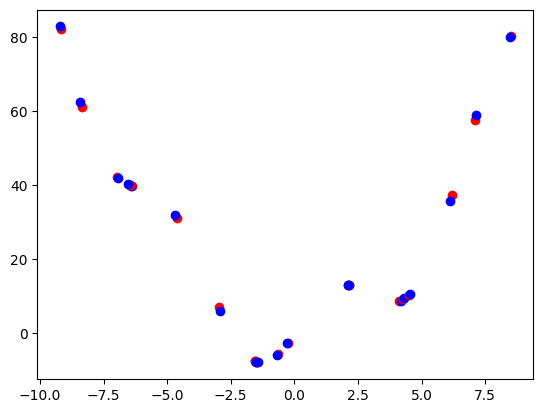

In [89]:
for i in range(len(Robots)):
  plt.scatter(Robots[i].r,Robots[i].f(Robots[i].r),color='r')
  Robots[i].Mutate()
  plt.scatter(Robots[i].r,Robots[i].f(Robots[i].r),color='b')

  #print(Robots[i].r)